In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=fetch_california_housing()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
cols = ["MedInc","AveRooms","AveBedrms","Population","AveOccup"]

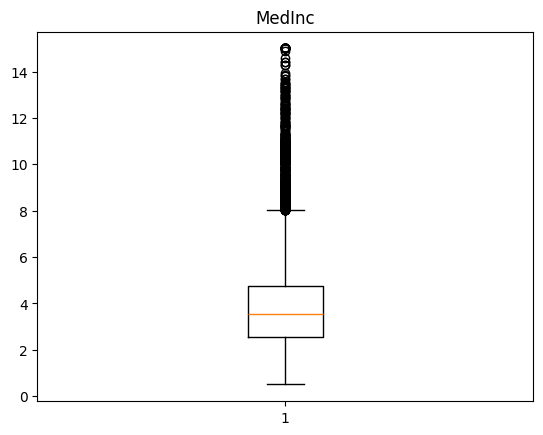

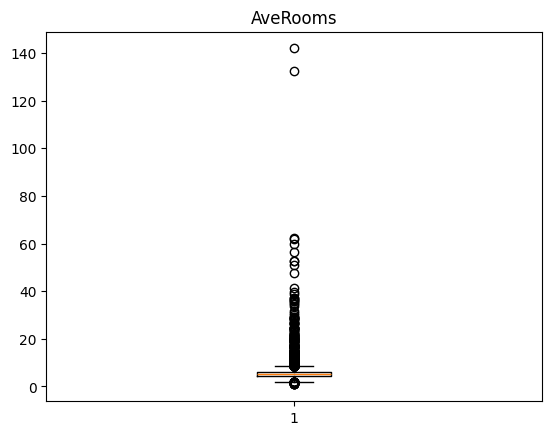

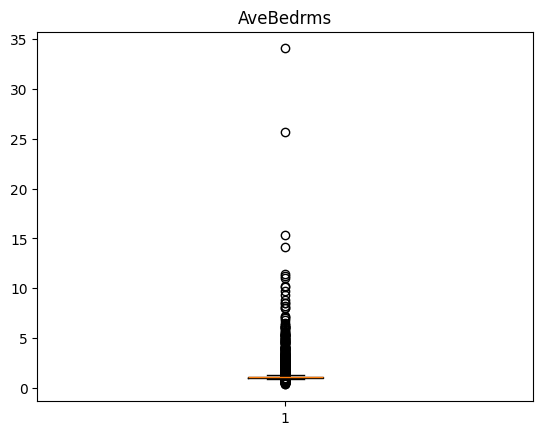

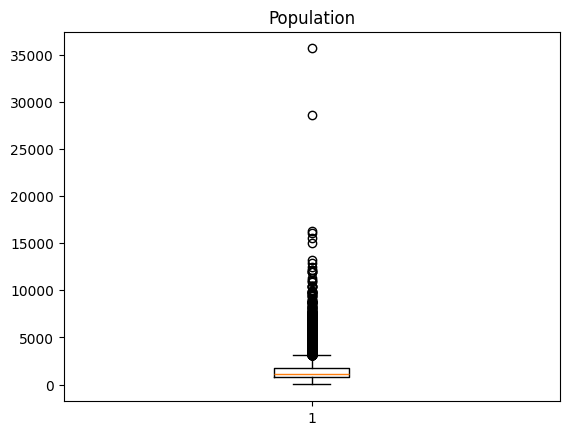

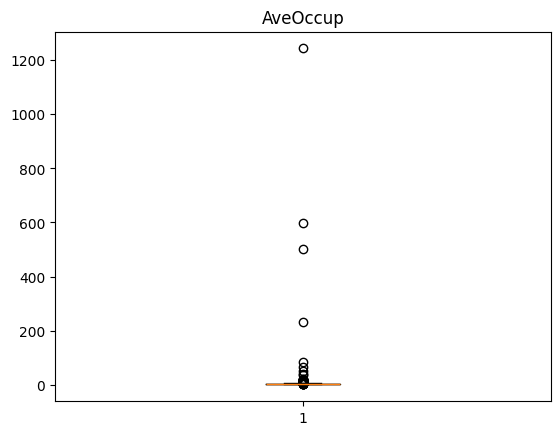

In [16]:
for i in cols:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [18]:
def detect_outliers(column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outliers=df[(df[column]<lower)|(df[column]>upper)]
  return outliers,upper,lower

for i in cols:
  outliers,low,up=detect_outliers(i)
  print(f"{cols}: {len(outliers)} outliers, lower={low:.2f}, upper={up:.2f}")


['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']: 681 outliers, lower=8.01, upper=-0.71
['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']: 511 outliers, lower=8.47, upper=2.02
['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']: 1424 outliers, lower=1.24, upper=0.87
['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']: 1196 outliers, lower=3132.00, upper=-620.00
['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']: 711 outliers, lower=4.56, upper=1.15


In [20]:
from scipy.stats import zscore
df_z=df[cols].apply(zscore)
z_outliers=df_z[(df_z>3)|(df_z<-3)]
z_outliers.count()

,0
MedInc,345
AveRooms,133
AveBedrms,145
Population,342
AveOccup,8


In [27]:
df_clean=df.copy()
df_clean.shape

(20640, 9)

In [28]:

for i in cols:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  df_clean=df_clean[(df_clean[i]>lower)&(df_clean[i]<upper)]
df_clean.shape

(16840, 9)

In [29]:
df_cap = df.copy()

for col in cols:
    Q1 = df_cap[col].quantile(0.25)
    Q3 = df_cap[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_cap[col] = np.where(df_cap[col] < lower, lower, df_cap[col])
    df_cap[col] = np.where(df_cap[col] > upper, upper, df_cap[col])


In [30]:
df_log = df.copy()

for col in ["Population", "AveOccup"]:
    df_log[col] = np.log1p(df_log[col])  # log(1+x)


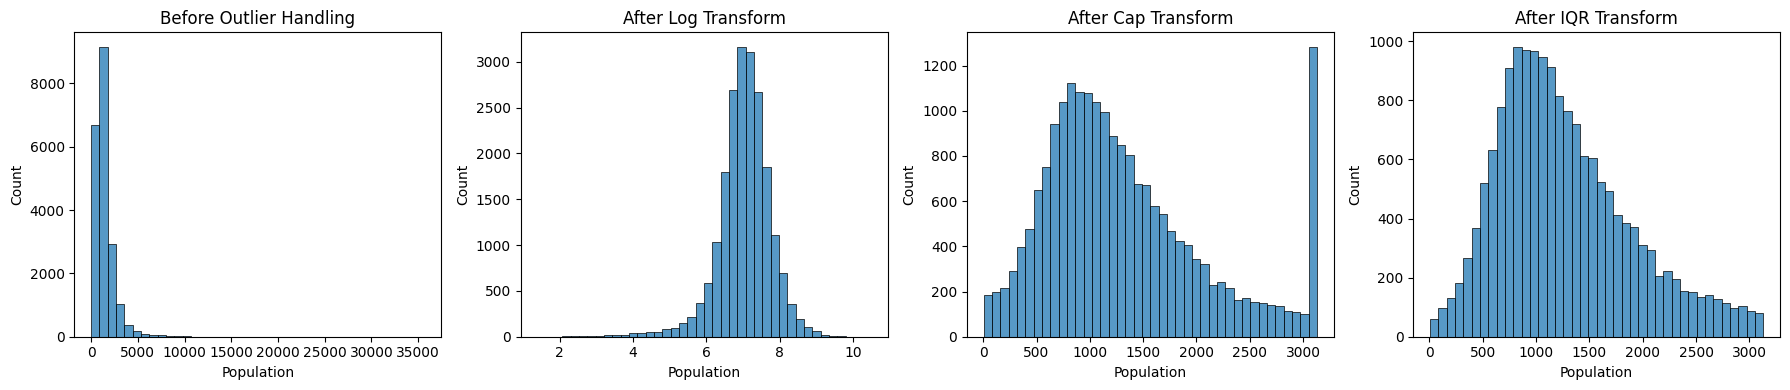

In [44]:

plt.figure(figsize=(18, 4))

# 1
plt.subplot(1, 4, 1)
sns.histplot(df["Population"], bins=40)
plt.title("Before Outlier Handling")

# 2
plt.subplot(1, 4, 2)
sns.histplot(df_log["Population"], bins=40)
plt.title("After Log Transform")

# 3
plt.subplot(1, 4, 3)
sns.histplot(df_cap["Population"], bins=40)
plt.title("After Cap Transform")

# 4
plt.subplot(1, 4, 4)
sns.histplot(df_clean["Population"], bins=40)
plt.title("After IQR Transform")

plt.tight_layout()
plt.show()



In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_std = scaler.fit_transform(df[cols])

scaled_std = pd.DataFrame(scaled_std, columns=cols)
scaled_std.describe()


,MedInc,AveRooms,AveBedrms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02
max,5.858286e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02


In [38]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
scaled_mm = minmax.fit_transform(df[cols])

scaled_mm = pd.DataFrame(scaled_mm, columns=cols)
scaled_mm.describe()


,MedInc,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.032488,0.022629,0.039869,0.001914
std,0.131020,0.017539,0.014049,0.031740,0.008358
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.025482,0.019943,0.021974,0.001398
50%,0.209301,0.031071,0.021209,0.032596,0.001711
75%,0.292641,0.036907,0.022713,0.048264,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000


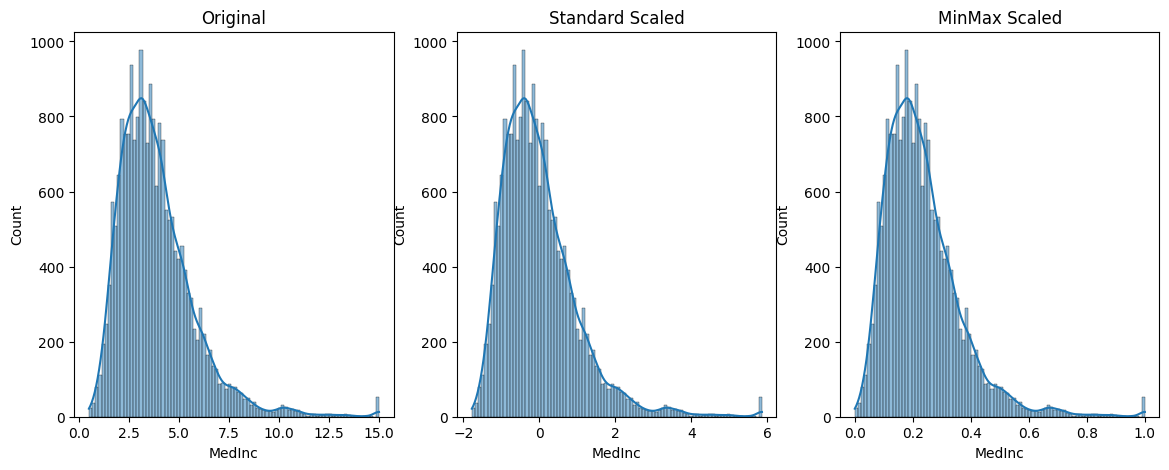

In [39]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.histplot(df["MedInc"], kde=True)
plt.title("Original")

plt.subplot(1,3,2)
sns.histplot(scaled_std["MedInc"], kde=True)
plt.title("Standard Scaled")

plt.subplot(1,3,3)
sns.histplot(scaled_mm["MedInc"], kde=True)
plt.title("MinMax Scaled")

plt.show()
